Introduction-

The aim is to investigate whether the number of asylum applications processed (decided on status) in the UK varies with the number of refugee or asylum seeker arrivals. This is an effort to assess whether the increase in arrivals overtime has been appropriately arranged for by the department in charge of processing applications. This is important to understand the backlog and thus, improve the refugee/asylum seeker conditions in the UK. They are often held in a state of limbo where they are waiting for a decision on their application and are thus, unable to work or send children to school. Government is also spending money, paying for their accomodation costs. More recently, agreements like the Rwanda agreement are to transfer refugees to Rwanda etc?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Number of applications overtime dataset, main applicants only
asylum_applications_file = 'asylum-applications-datasets-sep-2023.csv'

In [3]:
#skiprows=1 to not transfer the title, to ensure column names are headings 
number_of_applications = pd.read_csv(asylum_applications_file, skiprows=1)

/tmp/ipykernel_140/660198971.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  number_of_applications = pd.read_csv(asylum_applications_file, skiprows=1)


In [4]:
#Applications waiting decisions overtime dataset main applicants only
applications_awaiting_decisions_file = 'Copy of asylum-applications-awaiting-decision-datasets-sep-2023.csv'

In [5]:
applications_awaiting_decisions = pd.read_csv(applications_awaiting_decisions_file, skiprows=1)

In [6]:
number_of_applications.head()

,Year,Quarter,Nationality,Region,Age,Sex,Applicant type,UASC,Location of application,Applications
0,2001,2001 Q1,Afghanistan,Asia Central,Total (pre-2009),Total (pre-2009),Main Applicant,Total (pre-2006),At Port,"1,021"
1,2001,2001 Q1,Afghanistan,Asia Central,Total (pre-2009),Total (pre-2009),Main Applicant,Total (pre-2006),In Country,896
2,2001,2001 Q1,Albania,Europe Other,Total (pre-2009),Total (pre-2009),Main Applicant,Total (pre-2006),At Port,75
3,2001,2001 Q1,Albania,Europe Other,Total (pre-2009),Total (pre-2009),Main Applicant,Total (pre-2006),In Country,288
4,2001,2001 Q1,Algeria,Africa North,Total (pre-2009),Total (pre-2009),Main Applicant,Total (pre-2006),At Port,57


In [7]:
#year column as consistent data type
number_of_applications['Year'] = number_of_applications['Year'].astype(str)

In [8]:
#cleaning applications column by: removing commas, filling nan with 0, converting to int
#assumption- by filling nan with 0, unrecorded asylum applications are null
number_of_applications['Applications'] = number_of_applications['Applications'].str.replace(',', '')
number_of_applications['Applications'] = number_of_applications['Applications'].fillna(0).astype(int)


In [9]:
#number_of_applications.iloc[69576]- row marks end of table
no_of_applications= number_of_applications.drop([69576])


In [10]:
#groupby: total number of applications per year
applications_per_year = no_of_applications.groupby('Year')['Applications'].sum().reset_index()
applications_per_year.head()

,Year,Applications
0,2001,71027
1,2002,103081
2,2003,60047
3,2004,40623
4,2005,30841


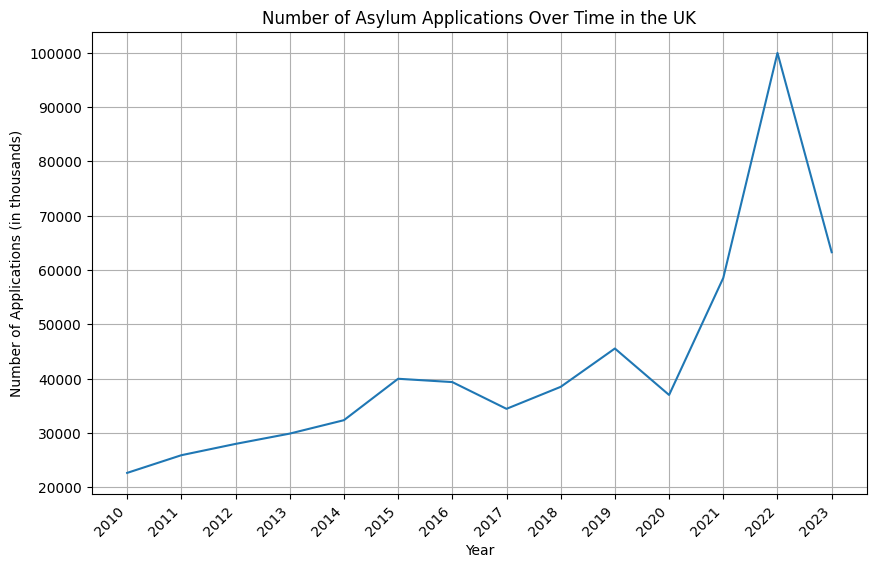

In [11]:
plt.figure(figsize=(10, 6))
x_axis = applications_per_year['Year'].iloc[9:]
y_axis = applications_per_year['Applications'].iloc[9:]
plt.plot(x_axis, y_axis)
plt.title('Number of Asylum Applications Over Time in the UK')
plt.xlabel('Year')
plt.ylabel('Number of Applications (in thousands)')

#Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.show()

This graph shows the number of asylum applications made in the UK. The fluctuations can be attributed to some geopolitical factors occuring at the same time, for example- the dip in applications made around 2020 can be a result of the Covid-19 pandemic.

In [12]:
#applications_awaiting_decisions.iloc[32695]
applications_awaiting_decisions.rename(columns={'Date (as at...)': 'Date'},inplace=True)
app_awaiting_decisions = applications_awaiting_decisions.drop([32695])

In [13]:
#applications_awaiting_decisions rename date column
#take out year from date in another column
app_awaiting_decisions['Date'] = pd.to_datetime(app_awaiting_decisions['Date'])
app_awaiting_decisions['Year'] = app_awaiting_decisions['Date'].dt.year
app_awaiting_decisions.head()

,Date,Nationality,Region,Applicant type,Application stage,Duration,Applications,Year
0,2010-06-30,Afghanistan,Asia Central,Dependant,Pending further review,N/A - Further review,129.0,2010
1,2010-06-30,Afghanistan,Asia Central,Dependant,Pending initial decision,6 months or less,38.0,2010
2,2010-06-30,Afghanistan,Asia Central,Dependant,Pending initial decision,More than 6 months,36.0,2010
3,2010-06-30,Afghanistan,Asia Central,Main Applicant,Pending further review,N/A - Further review,818.0,2010
4,2010-06-30,Afghanistan,Asia Central,Main Applicant,Pending initial decision,6 months or less,319.0,2010


In [14]:
#cleaning as above-
app_awaiting_decisions['Year'] = app_awaiting_decisions['Year'].astype(str)
#app_awaiting_decisions['Applications'] = app_awaiting_decisions['Applications'].astr.replace(',', '')
app_awaiting_decisions['Applications'] = app_awaiting_decisions['Applications'].fillna(0).astype(int)


In [23]:
#groupby: total number of applications that were pending decisions per year
app_awaiting_decisions_yearly = app_awaiting_decisions.groupby('Year')['Applications'].sum().reset_index()
app_awaiting_decisions_yearly


,Year,Applications
0,2010,49736
1,2011,67386
2,2012,67337
3,2013,82526
4,2014,117684
5,2015,125428
6,2016,135385
7,2017,127807
8,2018,138899
9,2019,190561


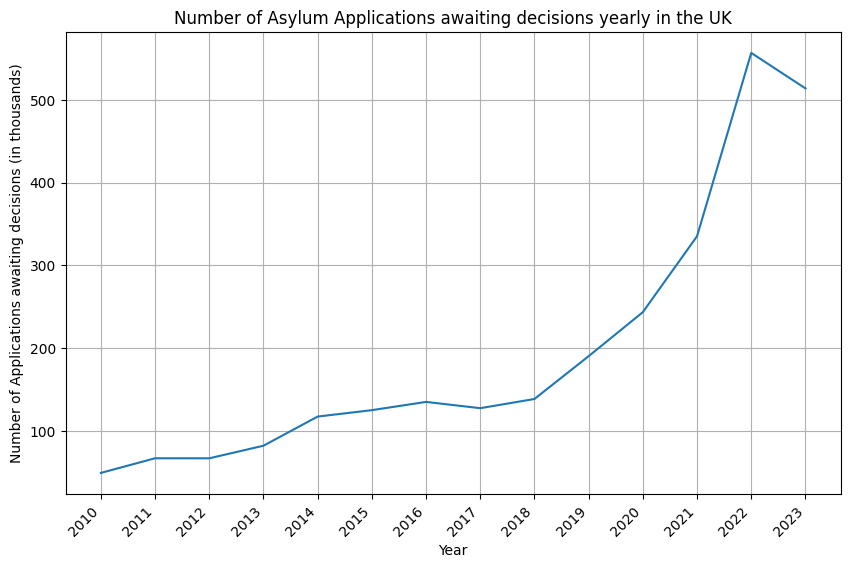

In [34]:
plt.figure(figsize=(10, 6))
x_axis_2 = app_awaiting_decisions_yearly['Year']
y_axis_2 = app_awaiting_decisions_yearly ['Applications']/1000
plt.plot(x_axis_2, y_axis_2)
plt.title('Number of Asylum Applications awaiting decisions yearly in the UK')
plt.xlabel('Year')
plt.ylabel('Number of Applications awaiting decisions (in thousands)')

#Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.show()

From this graph, we can see that the number of applications awaiting decisions follows the shape or fluctuations of the graph of number of applications. This indicates that the arrangements to process applications faster might not be taking place or not enough to assist in 

In [ ]:
#all from 2001-23, bar chart for number of applications made
#rejects vs grant
#plot trendline for awaiting applications (makes sense- includes dependants)
#proportionality
#compare means between the two
#groupby, most number of applications country, which nationality longest to process etccc
#



In [29]:
#mean, seeing the difference between mean of both to figure rate?
#not comparable because number of applications only includes main applicants
#and the awaiting applications includes dependants

mean_no_of_applications = applications_per_year['Applications'].iloc[9:].mean()
print('The mean of the number of applications per year is:', mean_no_of_applications)

mean_app_awaiting_decisions = app_awaiting_decisions_yearly['Applications'].mean()
print('The mean of the number of applications waiting decisions per year is:', mean_app_awaiting_decisions)


The mean of the number of applications per year is: 42516.357142857145
The mean of the number of applications waiting decisions per year is: 196550.85714285713


In [19]:
#plot barchart- with the total number of applications and a portion for backlog
#with a trendline of number of arrivals

In [20]:
#lin regress between the two- quantify and predict

In [ ]:
#groupby to see which country has the most number of applications
#which country longest to process applications of


In [18]:
#discrepancies with those awaiting decisions and their gender and age; 

In [21]:
#facilitating it to the point of proportionality? Ask tomorrow

In [22]:
#combinatory, comprehensive dataset
#initial decision and resettlement